[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/algoritmos-poli/sesiones_presenciales/blob/main/clase13/notebooks/analisis_algoritmos.ipynb) ![Built with AI](https://img.shields.io/badge/Built%20with-AI-blue.svg)

# Introducción al Análisis Algorítmico: Fundamentos de Eficiencia Computacional

## Objetivos de Aprendizaje

1. Comprender la importancia del análisis algorítmico dentro del desarrollo eficiente de programas.  
2. Diferenciar formalmente entre el análisis empírico (medición de tiempo) y el análisis asintótico (modelo matemático).
3. Distinguir entre los diferentes órdenes de crecimiento y su impacto en la eficiencia.  
4. Aplicar técnicas básicas de medición empírica de tiempo de ejecución en Python.  
5. Analizar fragmentos de código iterativos simples (bucles únicos y anidados) para determinar su complejidad temporal (Big O).
6. Analizar y comparar el desempeño de diferentes algoritmos para un mismo problema.  
7. Conectar la teoría asintótica con el rendimiento práctico mediante la verificación empírica en Python.

## 1. Contextualización e importancia

### 1.1. Importancia de la eficiencia en los algoritmos

Imaginemos dos servicios de GPS. Ambos calculan la ruta correcta para llegar a un destino. Sin embargo, la **Aplicación A** tarda **0.1 segundos** en encontrar la ruta, mientras que la **Aplicación B** tarda **15 segundos**. ¿Cuál usaría usted?

Ambas son *correctas*, pero una es *eficiente* y la otra no.

En el desarrollo de software y la ingeniería informática, no es suficiente que un algoritmo produzca un resultado correcto. La **eficiencia** con la que lo hace (recursos computacionales consumidos) es un pilar fundamental del diseño de sistemas. Esta es la dirección principal de este notebook: aprender a medir y predecir esta eficiencia.

### 1.2. Deficiencia del Análisis Empírico

Medir el tiempo de ejecución de un programa con un cronómetro (`time.time()`) es un método empírico útil, pero fundamentalmente deficiente para un análisis formal. Los resultados obtenidos de esta manera dependen de factores contingentes:
* La arquitectura y velocidad del procesador (CPU).
* La memoria disponible y la velocidad del bus de datos.
* El lenguaje de programación, su compilador o intérprete.
* El sistema operativo y la concurrencia de otros procesos.

El **Análisis de Algoritmos** proporciona un marco formal, matemático e independiente del hardware para cuantificar los recursos (principalmente tiempo y espacio) que un algoritmo consume en función del **tamaño de su entrada ($N$)**.

Este análisis nos permite:
* **Comparar** soluciones algorítmicas de manera objetiva.
* **Predecir** el comportamiento del algoritmo ante grandes volúmenes de datos (escalabilidad).
* **Tomar** decisiones de diseño informadas antes de la implementación.

## 2. Conceptos Teóricos Fundamentales

Adoptamos un enfoque disciplinado para el análisis, basado en el método científico, tal como lo describen Sedgewick y Wayne (2011, *Algorithms, 4th ed.*):

1.  **Observar:** Ejecutar el programa para varios tamaños de entrada.
2.  **Hipotetizar:** Formular un modelo matemático (una función) que describa el tiempo de ejecución.
3.  **Predecir:** Utilizar dicho modelo para predecir el rendimiento para entradas de mayor magnitud.
4.  **Verificar:** Corroborar empíricamente las predicciones.
5.  **Validar:** Repetir el proceso hasta que el modelo y las observaciones coincidan.

### 2.1. El Modelo Matemático: Costo y Frecuencia

Para construir nuestro modelo, definimos:

* **Tamaño de la entrada ($N$):** El parámetro que define la magnitud del problema (ej. el número de elementos en un array, $N$).
* **Costo $(T(N))$:** El tiempo de ejecución como una función de $N$. Se mide contando las **operaciones básicas** (primitivas computacionales) que se asumen de costo constante: asignaciones, comparaciones, operaciones aritméticas.
* **Conteo de Frecuencia:** El análisis del código fuente para determinar cuántas veces se ejecuta cada operación básica *en función de $N$*.

### 2.2. Notación Asintótica: Tilde (~) y Big O (O)

Rara vez necesitamos el conteo exacto (ej. $T(N) = 5N^2 + 22N + 100$). Estamos interesados en el comportamiento del algoritmo a medida que $N$ tiende a infinito ($N \to \infty$).

#### Notación Tilde ($\sim$)

Se utiliza para simplificar las expresiones matemáticas al desechar los términos de orden inferior y centrarse únicamente en el **término dominante** (leading term). Por ejemplo:
* Si $T(N) = \frac{1}{2}N^2 + 5N$, decimos que $T(N) \sim \frac{1}{2}N^2$.
* El término $5N$ es insignificante comparado con $N^2$ cuando $N$ es muy grande.

#### Notación Big O ($O$)

Define un **límite superior** (cota superior) para el orden de crecimiento. Es la notación más prevalente en la industria, ya que describe el **peor caso** (Worst Case), proporcionando una garantía de rendimiento.

> **Definición Formal:** <br> Se dice que $T(N)$ es $O(f(N))$ si existen constantes positivas $c$ y $N_0$ tales que $T(N) \le c \cdot f(N)$ para todo $N \ge N_0$.

#### Otras Notaciones

* **$\Omega$ (Big Omega):** Provee un límite inferior (mejor caso).
* **$\Theta$ (Big Theta):** Provee un límite ajustado (cuando $O$ y $\Omega$ coinciden).

### 2.3. Órdenes de Crecimiento Comunes

La siguiente jerarquía clasifica las funciones de costo comunes, de más eficientes (rápidas) a menos eficientes (lentas).

| Orden ($O(f(N))$) | Nombre | Ejemplo |
| :--- | :--- | :--- |
| **$O(1)$** | Constante | Acceso a un índice de array. `push`/`pop` en un Stack. |
| **$O(\log N)$** | Logarítmico | Búsqueda Binaria. |
| **$O(N)$** | Lineal | Búsqueda lineal. Encontrar el máximo en una lista. |
| **$O(N \log N)$** | Linearítmico | Mergesort, Quicksort (caso promedio), Heapsort. |
| **$O(N^2)$** | Cuadrático | Bucles anidados (Bubble Sort, Insertion Sort). |
| **$O(N^3)$** | Cúbico | Multiplicación de matrices (algoritmo ingenuo). |
| **$O(2^N)$** | Exponencial | Fibonacci recursivo simple. Subconjuntos (fuerza bruta).|
| **$O(N!)$** | Factorial | Permutaciones (ej. Problema del Viajante, fuerza bruta).|

### 2.4. Visualización del Crecimiento

Una visualización gráfica demuestra por qué el orden de crecimiento es tan crítico.

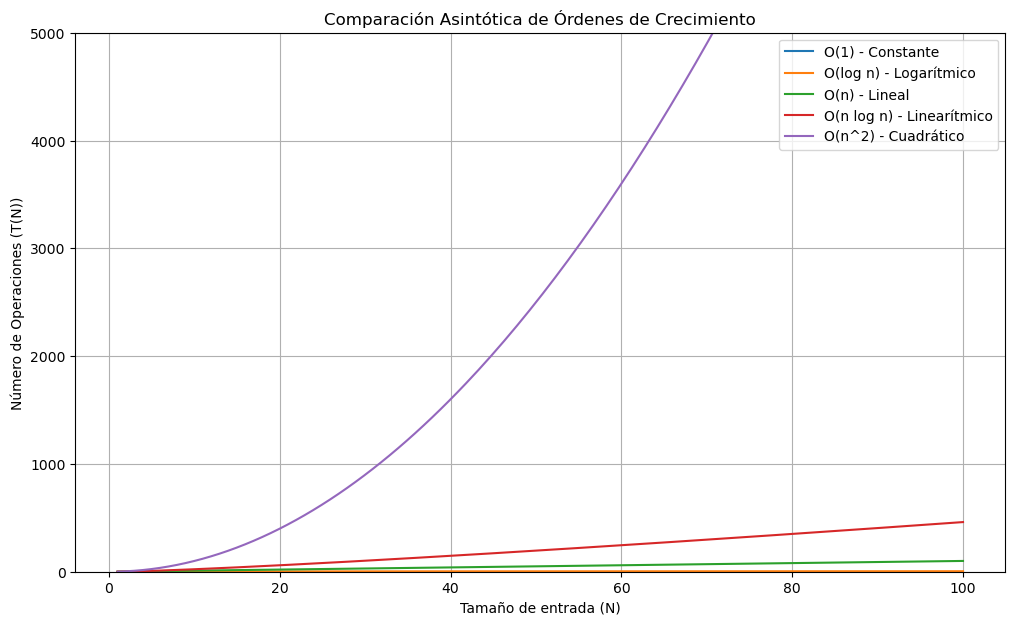

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Configuramos un rango de N
n = np.linspace(1, 100, 200)

# Definimos las funciones de crecimiento
o_1 = np.ones(n.shape)
o_log_n = np.log(n)
o_n = n
o_n_log_n = n * np.log(n)
o_n_cuadrado = n**2

# Graficamos
plt.figure(figsize=(12, 7))
plt.plot(n, o_1, label='O(1) - Constante')
plt.plot(n, o_log_n, label='O(log n) - Logarítmico')
plt.plot(n, o_n, label='O(n) - Lineal')
plt.plot(n, o_n_log_n, label='O(n log n) - Linearítmico')
plt.plot(n, o_n_cuadrado, label='O(n^2) - Cuadrático')

plt.legend()
plt.title('Comparación Asintótica de Órdenes de Crecimiento')
plt.xlabel('Tamaño de entrada (N)')
plt.ylabel('Número de Operaciones (T(N))')
plt.ylim(0, 5000) # Ajustamos el límite Y para apreciar las diferencias
plt.grid(True)
plt.show()

**Análisis del Gráfico:** Se observa cómo $O(N^2)$ crece de manera explosiva en comparación con $O(N \log N)$ y $O(N)$. $O(\log N)$ apenas es perceptible. Esta divergencia es la razón fundamental por la que la elección del algoritmo es crítica para la escalabilidad.

### 2.5 Modelos de análisis

- **Análisis empírico:** medición experimental mediante temporizadores.  
- **Análisis teórico:** estimación matemática del número de operaciones elementales.  
- **Análisis asintótico:** estudio del comportamiento del algoritmo para entradas grandes.

## 3. Ejemplos Resueltos

### 3.1. Análisis Teórico (Conteo de Pasos)

A continuación, se analiza la complejidad de fragmentos de código.

**Ejemplo 1: $O(1)$ (Constante)**

```python
def get_first_element(lista):
    # Esta operación (acceso a índice) no depende del tamaño 'N' de la lista
    return lista[0] 
```

*Análisis:* Independientemente de si la lista tiene 10 o 10 millones de elementos, acceder al primer índice es una única operación. $T(N) = c$. Su complejidad es $O(1)$.

**Ejemplo 2: $O(N)$ (Lineal)**

```python
def find_max(lista):
    max_val = lista[0] # 1 operación
    n = len(lista)
    # El bucle se ejecuta N-1 veces
    for i in range(1, n):
        # 1 comparación por iteración
        if lista[i] > max_val:
            max_val = lista[i] # 1 asignación (peor caso)
    return max_val
```

*Análisis:* El costo es dominado por el bucle `for`. Se realizan $\sim N$ comparaciones. $T(N) = c_1 \cdot N + c_0$. El término dominante es $N$. La complejidad es $O(N)$.

**Ejemplo 3: $O(N^2)$ (Cuadrático)**

```python
def has_duplicates(lista):
    n = len(lista)
    # Bucle externo se ejecuta N veces
    for i in range(n):
        # Bucle interno se ejecuta (N-1), (N-2), ... 1 veces
        for j in range(i + 1, n):
            # 1 comparación
            if lista[i] == lista[j]:
                return True
    return False
```

*Análisis:* El bucle externo se ejecuta $N$ veces. El bucle interno se ejecuta $\sim N/2$ veces en promedio. El número total de comparaciones es $\sim N \times (N/2) = \frac{1}{2}N^2$. $T(N) \sim c \cdot N^2$. La complejidad es $O(N^2)$.

**Ejemplo 4: $O(\log N)$ (Logarítmico)**

```python
def busqueda_binaria(lista_ordenada, objetivo):
    bajo = 0
    alto = len(lista_ordenada) - 1
    
    # El bucle se ejecuta mientras el espacio de búsqueda exista
    while bajo <= alto:
        medio = (bajo + alto) // 2
        if lista_ordenada[medio] == objetivo:
            return medio
        elif lista_ordenada[medio] < objetivo:
            bajo = medio + 1
        else:
            alto = medio - 1
    return -1
```

*Análisis:* En cada iteración del `while`, el algoritmo descarta la mitad del espacio de búsqueda restante. El número de pasos $k$ necesarios para reducir el problema de $N$ a 1 es tal que $N/2^k = 1$. Despejando $k$, obtenemos $N = 2^k \implies k = \log_2 N$. La complejidad es $O(\log N)$.

### 3.2. Verificación Empírica

Como se dijo previamente, es la medición experimental del tiempo de ejecución de un fragmento de codigo mediante temporizadores.  

```
# Inicio del temporizador (cronometro)
Code
# Detención del temporizador
```

Para realizar la medición la forma mas simple se emplea un cronómetro el cual es modelado como la clase `Stopwatch`

#### 3.1. Medición del tiempo de ejecución

En este ejemplo se exploran diferentes implementaciones de la función que suma los cuadrados:

$$
sum(n) = 1^2 + 2^2 + 3^2 + ... + n^2  
$$

El objetivo es determinar cual es mas eficiente.

**Implementación de las funciones**

In [10]:
def sum_squares_power(n):
    total = 0.0
    for i in range(1, n+1):
        total += i**2
    return total

def sum_squares_multiply(n):
    total = 0.0
    for i in range(1, n+1):
        total += i*i
    return total

def sum_squares_formula(n):
    return n * (n + 1) * (2*n + 1) // 6

**Test de las funciones**

In [11]:
# Test 
def test(got, expected):
  if got == expected:
    prefix = ' OK '
  else:
    prefix = '  X '
  print('%s got: %s expected: %s' % (prefix, repr(got), repr(expected)))

test(sum_squares_power(5), 55)
test(sum_squares_multiply(5), 55)
test(sum_squares_formula(5), 55)

 OK  got: 55.0 expected: 55
 OK  got: 55.0 expected: 55
 OK  got: 55 expected: 55


**Medida de desempeño**

In [12]:
import time

# Medición del tiempo de ejecución
n = 10_000_000

inicio = time.perf_counter()
sum_squares_power(n)
fin = time.perf_counter()
print(f"Potencia: {fin - inicio:.6f} segundos")

inicio = time.perf_counter()
sum_squares_multiply(n)
fin = time.perf_counter()
print(f"Multiplicación: {fin - inicio:.6f} segundos")

inicio = time.perf_counter()
sum_squares_formula(n)
fin = time.perf_counter()
print(f"Fórmula: {fin - inicio:.6f} segundos")

Potencia: 2.600160 segundos
Multiplicación: 1.901441 segundos
Fórmula: 0.000097 segundos


**Analisis de resultados**: Con `n=10_000_000` las versiones con bucle (`sum_squares_power` y `sum_squares_multiply`) muestran tiempos proporcionales a $N$ $(O(N))$, por lo que tardan segundos. La versión con la fórmula directa (`sum_squares_formula`) es $O(1)$ y se ejecuta prácticamente instantáneamente. Además, `i*i` suele ser algo más rápido que `i**2`, así que la implementación por multiplicación puede ser ligeramente más rápida que la que usa potencia. En conjunto, los resultados empíricos confirman las complejidades teóricas.

#### 3.2. Comparación de algoritmos de busqueda: Búsqueda Lineal vs. Binaria

Implementemos `busqueda_lineal` ($O(N)$) y `busqueda_binaria` ($O(\log N)$) y midamos su rendimiento en el peor caso usando `%timeit`.

In [15]:
def busqueda_lineal(lista, objetivo):
    for i in range(len(lista)):
        if lista[i] == objetivo:
            return i
    return -1

def busqueda_binaria(lista_ordenada, objetivo):
    bajo = 0
    alto = len(lista_ordenada) - 1
    while bajo <= alto:
        medio = (bajo + alto) // 2
        if lista_ordenada[medio] == objetivo:
            return medio
        elif lista_ordenada[medio] < objetivo:
            bajo = medio + 1
        else:
            alto = medio - 1
    return -1

**Test**

In [16]:
# Dato encontrado
test(busqueda_lineal([1, 3, 5, 7, 9], 7), 3)
test(busqueda_binaria([1, 3, 5, 7, 9], 7), 3)
# Dato no encontrado
test(busqueda_lineal([1, 3, 5, 7, 9], 2), -1)
test(busqueda_binaria([1, 3, 5, 7, 9], 2), -1)

 OK  got: 3 expected: 3
 OK  got: 3 expected: 3
 OK  got: -1 expected: -1
 OK  got: -1 expected: -1


**Medicion de desempeño**

In [17]:
# --- Configuración de la prueba --- 
# (La magic-cell %%timeit debe estar al inicio de la celda)

N_GRANDE = 10_000_000
lista_grande_ordenada = list(range(N_GRANDE))
objetivo_peor_caso = N_GRANDE - 1 # El último elemento

print(f"--- Verificación O(N): Búsqueda Lineal (N={N_GRANDE}) ---")
%timeit busqueda_lineal(lista_grande_ordenada, objetivo_peor_caso)

print(f"\n--- Verificación O(log N): Búsqueda Binaria (N={N_GRANDE}) ---")
%timeit busqueda_binaria(lista_grande_ordenada, objetivo_peor_caso)

--- Verificación O(N): Búsqueda Lineal (N=10000000) ---
730 ms ± 49.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

--- Verificación O(log N): Búsqueda Binaria (N=10000000) ---
6.31 μs ± 375 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


**Análisis de Resultados:** Se observará que el tiempo de la `busqueda_lineal` ($O(N)$) es significativamente mayor (del orden de milisegundos o segundos) que el de la `busqueda_binaria` ($O(\log N)$) (del orden de microsegundos o nanosegundos). Esto valida empíricamente cómo una mejor complejidad algorítmica impacta drásticamente el rendimiento en la práctica.

## 4. Ejercicios Propuestos

**Ejercicio 1 (Análisis Teórico):**
Determine la complejidad $O(f(N))$ del siguiente fragmento de código. $N$ es el número de filas (y columnas) de la matriz cuadrada. Justifique su respuesta contando las operaciones.

```python
def process_data(matrix):
    n = len(matrix)
    total_sum = 0
    
    # Bloque 1
    for i in range(n):
        for j in range(n):
            if i == j:
                total_sum += matrix[i][j]
    
    # Bloque 2
    row_sums = []
    for i in range(n):
        row_sum = 0
        # Nótese el límite del bucle interno
        for j in range(n // 2): 
            row_sum += matrix[i][j]
        row_sums.append(row_sum)
    
    return total_sum, row_sums
```

**Ejercicio 2 (Conceptual):**
Un algoritmo $A$ tiene una complejidad de $O(N \log N)$ y un algoritmo $B$ tiene una complejidad de $O(N^2)$. Para una entrada pequeña ($N=10$), el algoritmo $B$ (cuadrático) se ejecuta más rápido que el algoritmo $A$ (linearítmico). ¿Significa esto que el análisis asintótico es incorrecto o que $B$ es un mejor algoritmo? Justifique su respuesta.

**Ejercicio 3 (Implementación y Análisis de Espacio):**
La **complejidad espacial** mide la cantidad de memoria adicional que un algoritmo utiliza.
* a) Implemente una función `reverse_list_copy(lista)` que devuelva una *nueva* lista con los elementos invertidos. Determine su complejidad temporal y espacial.
* b) Implemente una función `reverse_list_inplace(lista)` que invierta la lista *sin* crear una nueva (modificando la original). Determine su complejidad temporal y espacial ($O(1)$ espacial).

## 5. Casos de Aplicación en la Ingeniería

El análisis algorítmico no es un ejercicio puramente académico; es una decisión de diseño diaria en la ingeniería de software.

* **Bases de Datos ($O(\log N)$):** Los Sistemas Gestores de Bases de Datos (ej. PostgreSQL, MySQL) no leen la tabla entera ($O(N)$) para encontrar un registro. Utilizan índices, comúnmente estructuras de **Árbol B+ (B-Tree)**, que permiten búsquedas, inserciones y borrados en tiempo $O(\log N)$.
* **Sistemas de Ruteo y Redes ($O(E \log V)$):** Los algoritmos de grafos, como el de **Dijkstra**, se utilizan para encontrar la ruta más corta en redes (Google Maps, enrutadores de Internet). La eficiencia de este algoritmo (ej. $O(E \log V)$ usando un montículo de Fibonacci, donde $E$ son aristas y $V$ vértices) es lo que permite obtener rutas en redes de millones de nodos casi instantáneamente.
* **Procesamiento Gráfico ($O(N \log N)$):** El "Algoritmo del Pintor" para renderizar escenas 3D requiere ordenar polígonos según su profundidad. Utilizar un algoritmo de ordenamiento $O(N^2)$ (como Bubble Sort) haría el renderizado en tiempo real imposible. Se requieren algoritmos $O(N \log N)$ (como Mergesort).

## 6. Conclusión

El análisis algorítmico es la herramienta formal que permite al ingeniero de informática discernir entre una solución "que funciona" y una solución "eficiente y escalable". Comprender la notación Big O y el impacto del orden de crecimiento es esencial para el diseño de sistemas de software robustos y de alto rendimiento que deben operar a gran escala.

## 7. Resultado de aprendizaje

Al completar exitosamente este módulo, se espera que el estudiante esté en capacidad de:
* Argumentar por qué el análisis asintótico es una métrica de rendimiento superior al tiempo de ejecución empírico para la comparación de algoritmos.
* Calcular la complejidad temporal (Big O) de algoritmos que involucren secuencias de bucles, bucles anidados y bloques condicionales simples.
* Clasificar una función de costo $T(N)$ dada (ej. $T(N) = 10N + N^3$) dentro de su familia de complejidad asintótica correcta (ej. $O(N^3)$).
* Justificar la selección de una estructura de datos o algoritmo sobre otro para un problema específico, basando la decisión en su eficiencia temporal y espacial.
* Interpretar gráficos de rendimiento empírico y correlacionarlos con las predicciones teóricas del análisis asintótico.

## 8. Refererencias

1. https://algs4.cs.princeton.edu/14analysis/
2. https://introcs.cs.princeton.edu/python/23recursion/
3. https://www.cs.princeton.edu/courses/archive/spring21/cos226/lectures/study/14AnalysisOfAlgorithms.html
4. https://realpython.com/python-timer/